# PCA

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

module_path = os.path.abspath(os.path.join( os.pardir, 'src'))
if module_path not in sys.path:
    sys.path.append(module_path)
from modules import dataloading as dl


In [2]:
df = pd.read_csv('../src/data/training_data.csv')
df = dl.rename_cols(df)
df.drop(index=18381, inplace=True)
df


,max_credit,gender,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr,default
0,220000,2,1,2,36,0,0,0,0,0,...,221193,181859,184605,10000,8018,10121,6006,10987,143779,1
1,200000,2,3,2,29,-1,-1,-1,-1,-1,...,326,326,326,326,326,326,326,326,326,0
2,180000,2,1,2,27,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3,80000,1,2,2,32,0,0,0,0,0,...,43882,42256,42527,1853,1700,1522,1548,1488,1500,0
4,10000,1,2,2,27,0,0,0,0,0,...,5444,2639,2697,2000,1100,600,300,300,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,2,2,1,38,0,0,3,2,2,...,39924,39004,41462,4600,1200,1400,0,3069,0,1
22496,350000,1,1,1,42,-1,-1,-1,-1,-1,...,3750,1362,8210,3138,4160,3750,2272,8210,9731,0
22497,100000,2,3,2,46,1,-1,2,2,-1,...,0,7856,16544,203,0,0,7856,10000,865,0
22498,20000,2,3,1,50,-1,-1,-1,-1,-2,...,0,0,0,3754,6906,290,0,0,0,1


In [3]:
drop_list = ['gender','education', 'default', 'marital_status']

for var in df.columns:
    if ('pay_status' in var):
        drop_list.append(var)

drop_list


['gender',
 'education',
 'default',
 'marital_status',
 'pay_status_sep',
 'pay_status_aug',
 'pay_status_jul',
 'pay_status_jun',
 'pay_status_may',
 'pay_status_apr']

In [4]:
df.drop(columns=drop_list, inplace=True)

In [5]:
df

,max_credit,age,bill_sep,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_sep,payment_aug,payment_jul,payment_jun,payment_may,payment_apr
0,220000,36,222598,222168,217900,221193,181859,184605,10000,8018,10121,6006,10987,143779
1,200000,29,326,326,326,326,326,326,326,326,326,326,326,326
2,180000,27,0,0,0,0,0,0,0,0,0,0,0,0
3,80000,32,51372,51872,47593,43882,42256,42527,1853,1700,1522,1548,1488,1500
4,10000,27,8257,7995,4878,5444,2639,2697,2000,1100,600,300,300,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,40000,38,35183,39197,39477,39924,39004,41462,4600,1200,1400,0,3069,0
22496,350000,42,3800,3138,4150,3750,1362,8210,3138,4160,3750,2272,8210,9731
22497,100000,46,0,203,203,0,7856,16544,203,0,0,7856,10000,865
22498,20000,50,5141,3455,6906,0,0,0,3754,6906,290,0,0,0


In [6]:
x = df.values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
x

array([[ 0.40770547,  0.05976436,  2.29817836, ...,  0.07642324,
         0.39474447,  7.74269307],
       [ 0.25369592, -0.69802226, -0.68659634, ..., -0.28142827,
        -0.29274684, -0.27505581],
       [ 0.09968637, -0.91453273, -0.69097402, ..., -0.30196693,
        -0.31376946, -0.29327632],
       ...,
       [-0.51635184,  1.14231667, -0.69097402, ...,  0.19297698,
         0.33109623, -0.2449305 ],
       [-1.13239006,  1.57533759, -0.62193821, ..., -0.30196693,
        -0.31376946, -0.29327632],
       [-1.13239006, -1.13104319, -0.5334714 , ..., -0.20116369,
        -0.26218021, -0.24856342]])

In [8]:
PCA_labels = list(range(1, x.shape[1] + 1))

for i in list(range(x.shape[1])):
    PCA_labels[i] = 'PC' + str(PCA_labels[i])
    
PCA_labels

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [9]:
pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = PCA_labels)

In [10]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
pc1 = pca.components_[0]
pc2 = pca.components_[1]
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=df.columns)
str_loading_1.sort_values(ascending=False)

bill_jun       0.951905
bill_may       0.943950
bill_jul       0.941926
bill_aug       0.932779
bill_apr       0.924579
bill_sep       0.909715
max_credit     0.409225
payment_sep    0.324989
payment_jul    0.321919
payment_jun    0.294453
payment_aug    0.278817
payment_may    0.278361
payment_apr    0.253368
age            0.081766
dtype: float64

In [11]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=df.columns)
str_loading_2.sort_values(ascending=False)

payment_aug    0.547170
payment_sep    0.533474
payment_jul    0.529877
payment_jun    0.471940
payment_apr    0.428297
payment_may    0.376389
max_credit     0.363588
age            0.081965
bill_apr      -0.132371
bill_may      -0.149001
bill_jun      -0.164359
bill_jul      -0.164483
bill_aug      -0.222525
bill_sep      -0.244326
dtype: float64

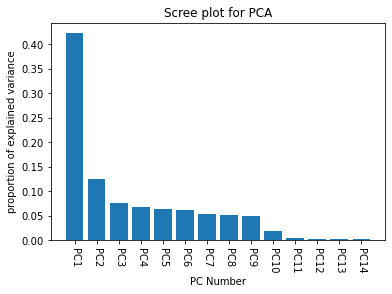

In [12]:
index = list(range(1, x.shape[1] + 1))
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xticks(ticks=index, labels=PCA_labels, rotation=-90)
plt.xlabel('PC Number')
plt.ylabel('proportion of explained variance')
plt.show()

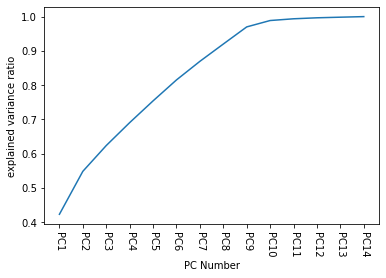

In [14]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(ticks=list(range(0, x.shape[1])), labels=PCA_labels, rotation=-90)
plt.xlabel('PC Number')
plt.ylabel('explained variance ratio')
plt.show()